In [31]:
#Librerías para manipulación de datos
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
import joblib  ### para guardar modelos


In [32]:
###----Lectura de datos----###
df = pd.read_csv("https://raw.githubusercontent.com/andressj1/Predicci-n-precio-de-m-viles-/refs/heads/main/Datos/X", sep=",")

In [33]:
###----Divicion de datos----###
X = df.drop('price_range', axis = 1)
y = df.price_range

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresión Logistica 

In [34]:
log = LogisticRegression(class_weight="balanced", random_state = 42).fit(X_train, y_train)

------------------------------ Train ------------------------------


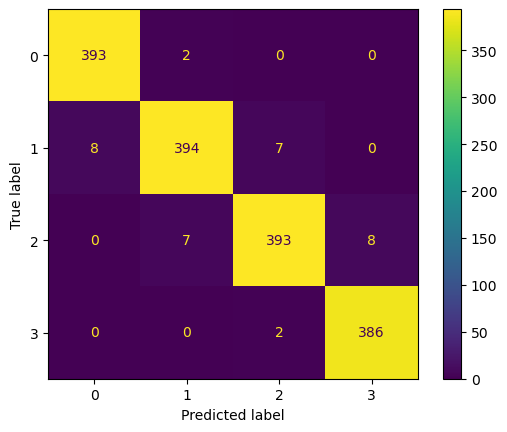

------------------------------ TRAIN ------------------------------
Precision (train): 0.9787332529774172
Recall (train): 0.97875
F1 score (train): 0.9786865579837116
Train score (accuracy):  0.97875


In [35]:
# Predecir con el modelo entrenado
y_pred = log.predict(X_train)

# Calcular la matriz de confusión
mc = confusion_matrix(y_train, y_pred)

# Mostrar la matriz de confusión
print('-'*30, 'Train', '-'*30)
cm1_display = ConfusionMatrixDisplay(confusion_matrix=mc)
cm1_display.plot()
plt.show()

# Métricas para los datos de entrenamiento
precision_train = precision_score(y_train, y_pred, average='weighted')
recall_train = recall_score(y_train, y_pred, average='weighted')
f1_train = f1_score(y_train, y_pred, average='weighted')
accuracy_train = accuracy_score(y_train, y_pred)

# Imprimir los resultados de entrenamiento
print('-'*30, 'TRAIN', '-'*30)
print(f'Precision (train): {precision_train}')
print(f'Recall (train): {recall_train}')
print(f'F1 score (train): {f1_train}')
print('Train score (accuracy): ', accuracy_train)



------------------------------ TEST ------------------------------


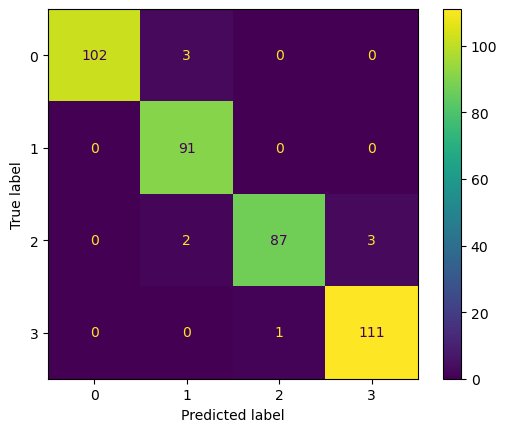

------------------------------ TEST ------------------------------
Precision (test): 0.9781689842503988
Recall (test): 0.9775
F1 score (test): 0.9774903455943224
Test score (accuracy):  0.9775


In [36]:
# Predecir con el modelo entrenado
y_pred = log.predict(X_test)

# Calcular la matriz de confusión
mc = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print('-'*30, 'TEST', '-'*30)
cm1_display = ConfusionMatrixDisplay(confusion_matrix=mc)
cm1_display.plot()
plt.show()

# Métricas para los datos de prueba
precision_test = precision_score(y_test, y_pred, average='weighted')
recall_test = recall_score(y_test, y_pred, average='weighted')
f1_test = f1_score(y_test, y_pred, average='weighted')
accuracy_test = accuracy_score(y_test, y_pred)

# Imprimir los resultados de prueba
print('-'*30, 'TEST', '-'*30)
print(f'Precision (test): {precision_test}')
print(f'Recall (test): {recall_test}')
print(f'F1 score (test): {f1_test}')
print('Test score (accuracy): ', accuracy_test)


# Arbol de decisión 

In [37]:
dt = DecisionTreeClassifier(class_weight="balanced", random_state = 42).fit(X_train, y_train)

------------------------------ Train ------------------------------


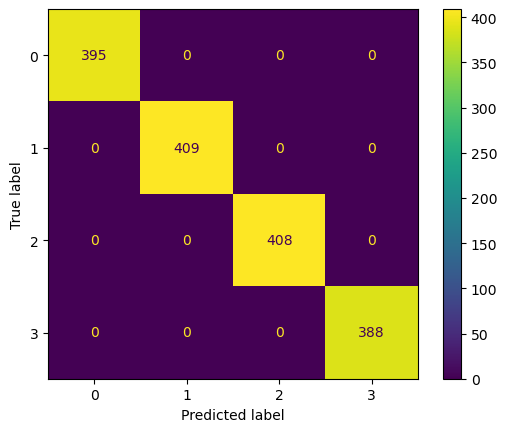

------------------------------ TRAIN ------------------------------
Precision (train): 1.0
Recall (train): 1.0
F1 score (train): 1.0
Train score (accuracy):  1.0


In [38]:
# Predecir con el modelo entrenado
y_pred = dt.predict(X_train)

# Calcular la matriz de confusión
mc = confusion_matrix(y_train, y_pred)

# Mostrar la matriz de confusión
print('-'*30, 'Train', '-'*30)
cm1_display = ConfusionMatrixDisplay(confusion_matrix=mc)
cm1_display.plot()
plt.show()

# Métricas para los datos de entrenamiento
precision_train = precision_score(y_train, y_pred, average='weighted')
recall_train = recall_score(y_train, y_pred, average='weighted')
f1_train = f1_score(y_train, y_pred, average='weighted')
accuracy_train = accuracy_score(y_train, y_pred)

# Imprimir los resultados de entrenamiento
print('-'*30, 'TRAIN', '-'*30)
print(f'Precision (train): {precision_train}')
print(f'Recall (train): {recall_train}')
print(f'F1 score (train): {f1_train}')
print('Train score (accuracy): ', accuracy_train)

------------------------------ TEST ------------------------------


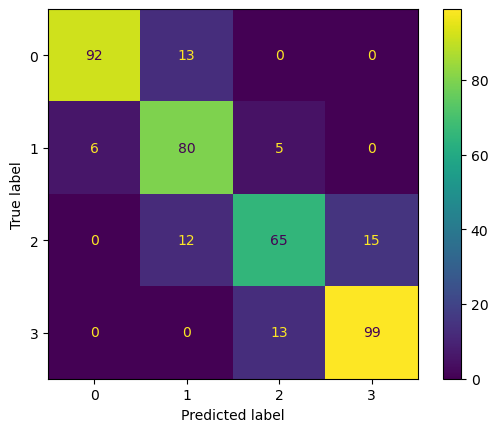

------------------------------ TEST ------------------------------
Precision (test): 0.8430402814264576
Recall (test): 0.84
F1 score (test): 0.8398121975674616
Test score (accuracy):  0.84


In [39]:
# Predecir con el modelo entrenado
y_pred = dt.predict(X_test)

# Calcular la matriz de confusión
mc = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print('-'*30, 'TEST', '-'*30)
cm1_display = ConfusionMatrixDisplay(confusion_matrix=mc)
cm1_display.plot()
plt.show()

# Métricas para los datos de prueba
precision_test = precision_score(y_test, y_pred, average='weighted')
recall_test = recall_score(y_test, y_pred, average='weighted')
f1_test = f1_score(y_test, y_pred, average='weighted')
accuracy_test = accuracy_score(y_test, y_pred)

# Imprimir los resultados de prueba
print('-'*30, 'TEST', '-'*30)
print(f'Precision (test): {precision_test}')
print(f'Recall (test): {recall_test}')
print(f'F1 score (test): {f1_test}')
print('Test score (accuracy): ', accuracy_test)

# Random Forest

In [40]:
rf = RandomForestClassifier(class_weight="balanced", random_state = 42).fit(X_train, y_train)

------------------------------ Train ------------------------------


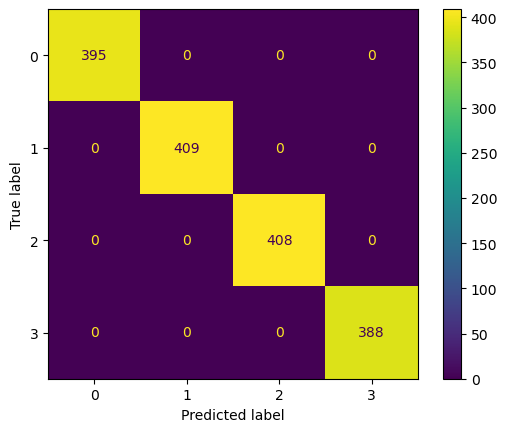

------------------------------ TRAIN ------------------------------
Precision (train): 1.0
Recall (train): 1.0
F1 score (train): 1.0
Train score (accuracy):  1.0


In [41]:
# Predecir con el modelo entrenado
y_pred = rf.predict(X_train)

# Calcular la matriz de confusión
mc = confusion_matrix(y_train, y_pred)

# Mostrar la matriz de confusión
print('-'*30, 'Train', '-'*30)
cm1_display = ConfusionMatrixDisplay(confusion_matrix=mc)
cm1_display.plot()
plt.show()

# Métricas para los datos de entrenamiento
precision_train = precision_score(y_train, y_pred, average='weighted')
recall_train = recall_score(y_train, y_pred, average='weighted')
f1_train = f1_score(y_train, y_pred, average='weighted')
accuracy_train = accuracy_score(y_train, y_pred)

# Imprimir los resultados de entrenamiento
print('-'*30, 'TRAIN', '-'*30)
print(f'Precision (train): {precision_train}')
print(f'Recall (train): {recall_train}')
print(f'F1 score (train): {f1_train}')
print('Train score (accuracy): ', accuracy_train)


------------------------------ TEST ------------------------------


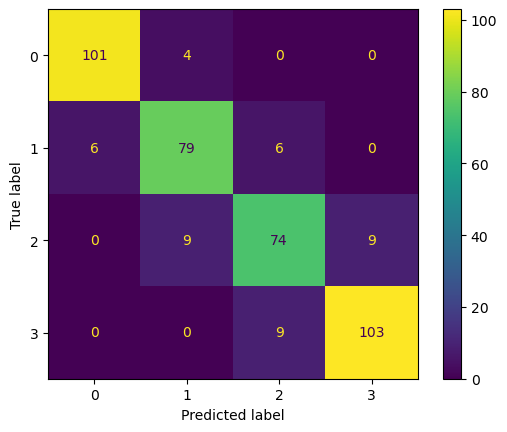

------------------------------ TEST ------------------------------
Precision (test): 0.8918695897575207
Recall (test): 0.8925
F1 score (test): 0.8921049878981657
Test score (accuracy):  0.8925


In [42]:
# Predecir con el modelo entrenado
y_pred = rf.predict(X_test)

# Calcular la matriz de confusión
mc = confusion_matrix(y_test, y_pred)

# Mostrar la matriz de confusión
print('-'*30, 'TEST', '-'*30)
cm1_display = ConfusionMatrixDisplay(confusion_matrix=mc)
cm1_display.plot()
plt.show()

# Métricas para los datos de prueba
precision_test = precision_score(y_test, y_pred, average='weighted')
recall_test = recall_score(y_test, y_pred, average='weighted')
f1_test = f1_score(y_test, y_pred, average='weighted')
accuracy_test = accuracy_score(y_test, y_pred)

# Imprimir los resultados de prueba
print('-'*30, 'TEST', '-'*30)
print(f'Precision (test): {precision_test}')
print(f'Recall (test): {recall_test}')
print(f'F1 score (test): {f1_test}')
print('Test score (accuracy): ', accuracy_test)

Conclusión: El mejor modelo es el de regresión logistica; muestra una mejor clasificación en la matriz de confusión 

In [44]:
# Exportar Modelo 
joblib.dump(log, "salidas\\m_lreg.pkl") 


['salidas\\m_lreg.pkl']